<a href="https://colab.research.google.com/github/pragy10/ML_basics/blob/main/mental_state_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, classification_report

In [ ]:
mental_state = pd.read_csv('/content/train.csv')
mental_state.head()

,ID,ph_no,cvv,credit_card_number,job,email,url,country,name,6aHwr,...,k4TZf,GqVFO,DW8Cg,DJIFU,75iYS,EFCtT,iwyoe,SFPf1,lLlb9,state
0,0,3.750960e+09,302.0,3.493352e+14,Psychotherapist,louisdavis@gmail.com,www.louisdavis.com,Bermuda,Louis Davis,0.919187,...,-8.178829,2.207414,-4.182041,-1.469835,-1.212941,0.919187,-12.213110,-4.663653,1.430586,Pain
1,1,5.519318e+09,914.0,6.570544e+15,Medical illustrator,traciehayes@gmail.com,www.traciehayes.com,Namibia,Tracie Hayes,-1.671690,...,-0.387062,-3.982390,-0.348661,0.303297,1.793963,-1.671690,NaN,-1.704551,-2.044453,Dread
2,2,3.687519e+09,640.0,4.190927e+15,Camera operator,keithmacias@gmail.com,www.keithmacias.com,Kazakhstan,Keith Macias,0.683576,...,-0.341926,-0.118434,-1.334923,-0.788028,1.552351,0.683576,5.030372,0.538157,-1.382629,Tears
3,3,6.089666e+09,804.0,6.759437e+11,Private music teacher,jasonsolis@gmail.com,www.jasonsolis.com,Tanzania,Jason Solis,1.733588,...,-5.302018,-4.328039,1.312201,-3.061046,3.885379,1.733588,3.006345,-1.930160,0.953684,Despair
4,4,9.419470e+09,83.0,6.011941e+15,Nature conservation officer,tyronerussell@gmail.com,www.tyronerussell.com,Tajikistan,Tyrone Russell,-0.252053,...,-10.397021,-1.137285,-0.872917,1.428116,-2.247511,-0.252053,-9.306005,-3.833464,0.858173,Tears


In [ ]:
mental_state.dtypes

ID                      int64
ph_no                 float64
cvv                   float64
credit_card_number    float64
job                    object
email                  object
url                    object
country                object
name                   object
6aHwr                 float64
CbKM4                 float64
PwJxl                 float64
rWVvg                 float64
98Zw0                 float64
9buXh                 float64
j2tg7                 float64
9zmpX                 float64
iLeEz                 float64
qLsIs                 float64
cBLeM                 float64
Kawff                 float64
lsMPq                 float64
Q30cK                 float64
9xquw                 float64
Q9hGx                 float64
Yy1lr                 float64
QcKox                 float64
xSzpX                 float64
nU1qr                 float64
IF0vw                 float64
k4TZf                 float64
GqVFO                 float64
DW8Cg                 float64
DJIFU     

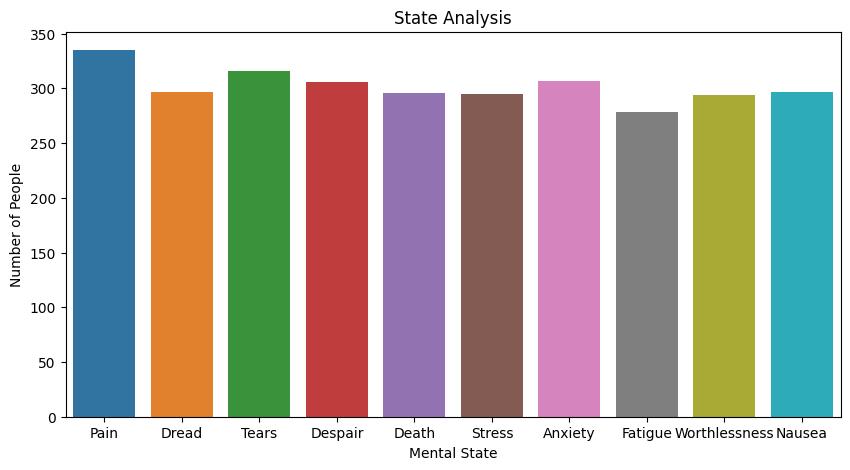

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='state', data=mental_state)
plt.title('State Analysis')
plt.xlabel('Mental State')
plt.ylabel('Number of People')
plt.show()

<ipython-input-11-f1d8a2fc3b98>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = mental_state.corr()


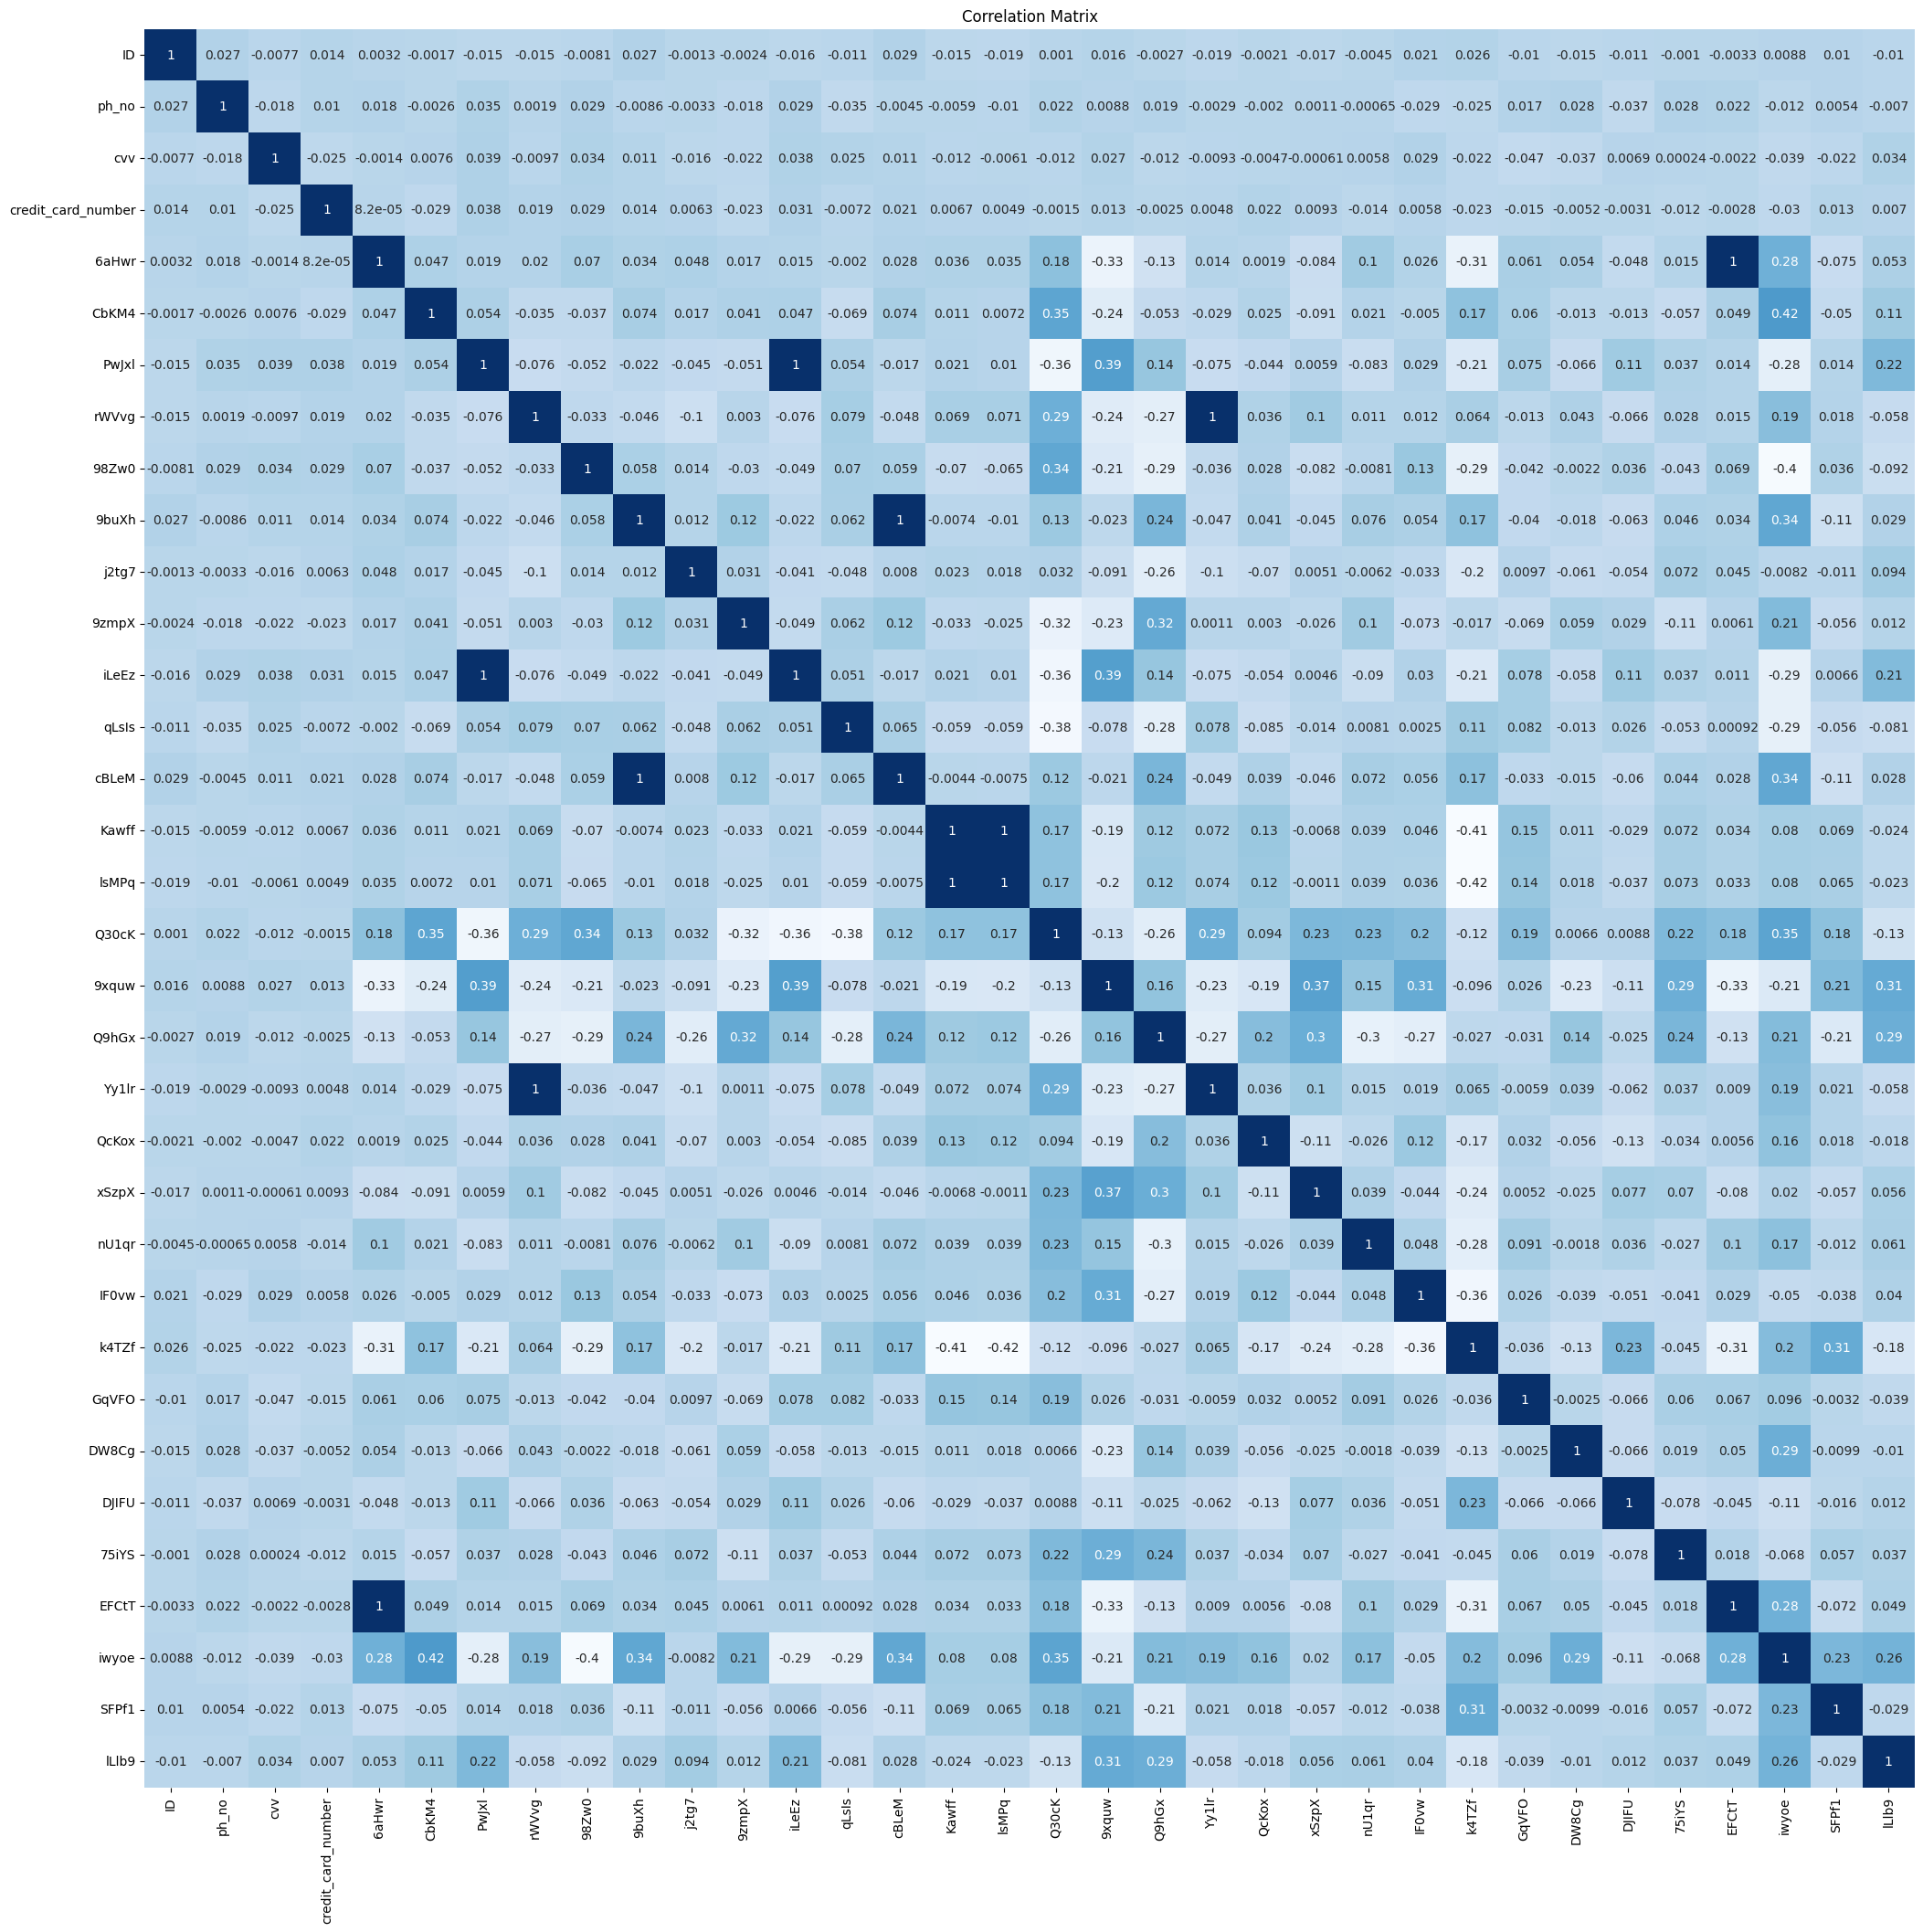

In [ ]:
plt.figure(figsize=(25,25))
correlation = mental_state.corr()
sns.heatmap(correlation, annot=True, cmap='Blues', cbar=False)
plt.title('Correlation Matrix')
plt.show()

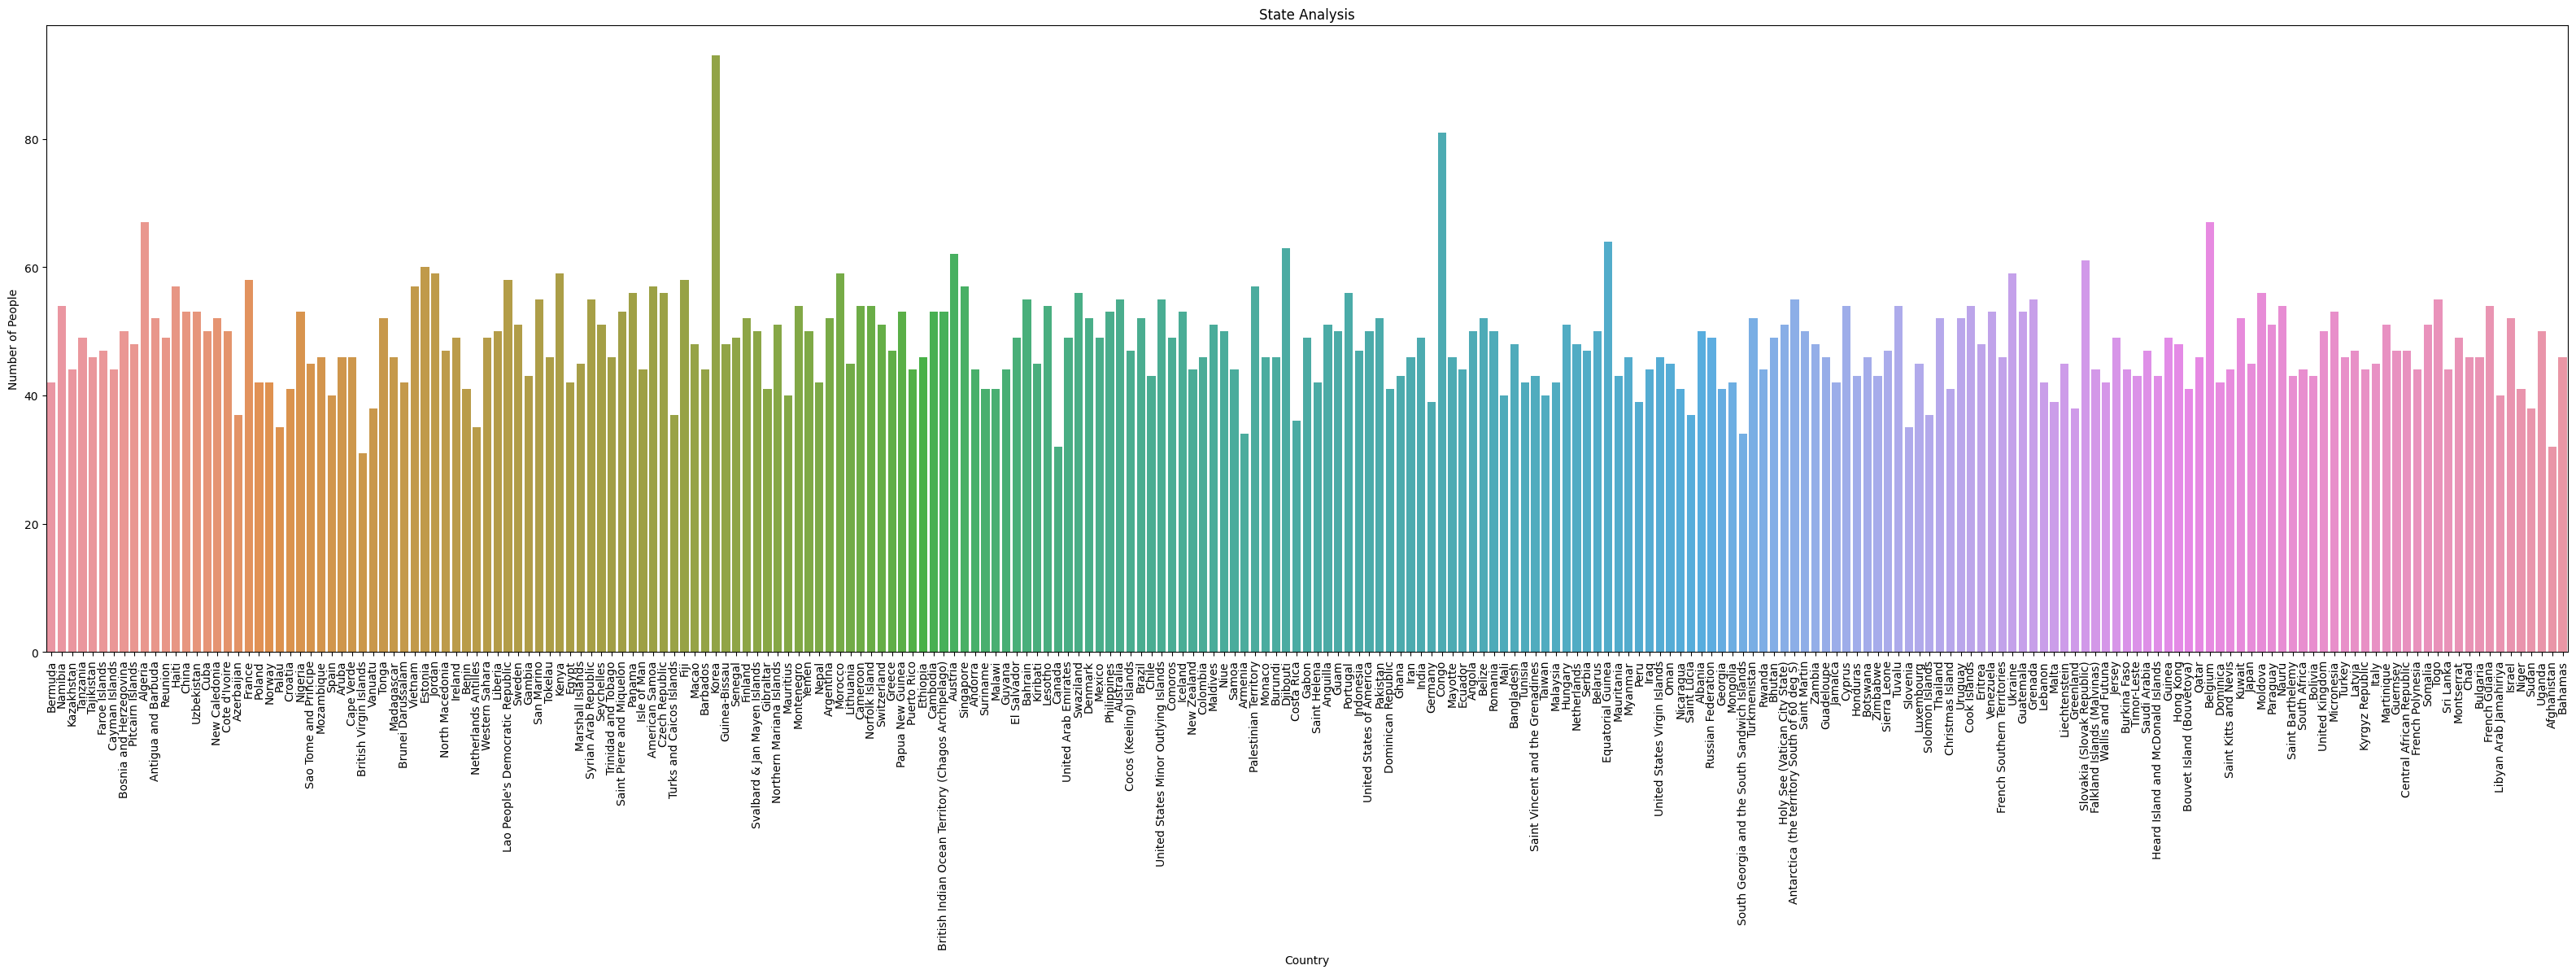

In [ ]:
plt.figure(figsize=(40,10))
sns.countplot(x='country', data=mental_state)
plt.title('State Analysis')
plt.xlabel('Country')
plt.ylabel('Number of People')
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(mental_state.shape)

(12000, 40)


In [ ]:
mental_state['state'].value_counts()

Anxiety          1227
Tears            1224
Worthlessness    1220
Despair          1210
Death            1205
Pain             1188
Stress           1188
Dread            1182
Fatigue          1181
Nausea           1175
Name: state, dtype: int64

In [ ]:
label_encode=LabelEncoder()
labels = label_encode.fit_transform(mental_state.state)
mental_state['target']=labels
mental_state['job'] = label_encode.fit_transform(mental_state['job'])
mental_state['country'] = label_encode.fit_transform(mental_state['country'])
mental_state['name'] = label_encode.fit_transform(mental_state['name'])
mental_state['state'] = label_encode.fit_transform(mental_state['state'])
mental_state['email'] = label_encode.fit_transform(mental_state['email'])
mental_state['url'] = label_encode.fit_transform(mental_state['url'])
mental_state['6aHwr'] = label_encode.fit_transform(mental_state['6aHwr'])
mental_state['CbKM4'] = label_encode.fit_transform(mental_state['CbKM4'])
mental_state['PwJxl'] = label_encode.fit_transform(mental_state['PwJxl'])
mental_state['rWVvg'] = label_encode.fit_transform(mental_state['rWVvg'])
mental_state['98Zw0'] = label_encode.fit_transform(mental_state['98Zw0'])
mental_state['9buXh'] = label_encode.fit_transform(mental_state['9buXh'])
mental_state['j2tg7'] = label_encode.fit_transform(mental_state['j2tg7'])
mental_state['9zmpX'] = label_encode.fit_transform(mental_state['9zmpX'])
mental_state['iLeEz'] = label_encode.fit_transform(mental_state['iLeEz'])
mental_state['qLsIs'] = label_encode.fit_transform(mental_state['qLsIs'])
mental_state['cBLeM'] = label_encode.fit_transform(mental_state['cBLeM'])
mental_state['Kawff'] = label_encode.fit_transform(mental_state['Kawff'])
mental_state['lsMPq'] = label_encode.fit_transform(mental_state['lsMPq'])
mental_state['Q30cK'] = label_encode.fit_transform(mental_state['Q30cK'])
mental_state['9xquw'] = label_encode.fit_transform(mental_state['9xquw'])
mental_state['Q9hGx'] = label_encode.fit_transform(mental_state['Q9hGx'])
mental_state['Yy1lr'] = label_encode.fit_transform(mental_state['Yy1lr'])
mental_state['QcKox'] = label_encode.fit_transform(mental_state['QcKox'])
mental_state['xSzpX'] = label_encode.fit_transform(mental_state['xSzpX'])
mental_state['nU1qr'] = label_encode.fit_transform(mental_state['nU1qr'])
mental_state['IF0vw'] = label_encode.fit_transform(mental_state['IF0vw'])
mental_state['k4TZf'] = label_encode.fit_transform(mental_state['k4TZf'])
mental_state['GqVFO'] = label_encode.fit_transform(mental_state['GqVFO'])
mental_state['DW8Cg'] = label_encode.fit_transform(mental_state['DW8Cg'])
mental_state['DJIFU'] = label_encode.fit_transform(mental_state['DJIFU'])
mental_state['75iYS'] = label_encode.fit_transform(mental_state['75iYS'])
mental_state['EFCtT'] = label_encode.fit_transform(mental_state['EFCtT'])
mental_state['iwyoe'] = label_encode.fit_transform(mental_state['iwyoe'])
mental_state['SFPf1'] = label_encode.fit_transform(mental_state['SFPf1'])
mental_state['lLlb9'] = label_encode.fit_transform(mental_state['lLlb9'])

mental_state.head()

,ID,ph_no,cvv,credit_card_number,job,email,url,country,name,6aHwr,...,GqVFO,DW8Cg,DJIFU,75iYS,EFCtT,iwyoe,SFPf1,lLlb9,state,target
0,0,3.750960e+09,302.0,3.493352e+14,479,6591,6582,23,6584,7319,...,9218,926,2838,3724,7330,428,673,8077,6,6
1,1,5.519318e+09,914.0,6.570544e+15,370,10366,10339,148,10353,3176,...,877,5967,5752,8456,3193,11675,3542,2581,3,3
2,2,3.687519e+09,640.0,4.190927e+15,78,5770,5768,111,5763,6932,...,5670,4300,3863,8122,6949,9334,7163,3518,8,8
3,3,6.089666e+09,804.0,6.759437e+11,452,4316,4321,214,4326,8582,...,678,8581,1205,10675,8582,8212,3207,7352,2,2
4,4,9.419470e+09,83.0,6.011941e+15,395,10499,10470,213,10476,5386,...,4012,5069,7683,2391,5408,1001,1181,7192,8,8


In [ ]:
print(mental_state.isnull().sum())

ID                      0
ph_no                 299
cvv                   327
credit_card_number    314
job                     0
email                   0
url                     0
country                 0
name                    0
6aHwr                   0
CbKM4                   0
PwJxl                   0
rWVvg                   0
98Zw0                   0
9buXh                   0
j2tg7                   0
9zmpX                   0
iLeEz                   0
qLsIs                   0
cBLeM                   0
Kawff                   0
lsMPq                   0
Q30cK                   0
9xquw                   0
Q9hGx                   0
Yy1lr                   0
QcKox                   0
xSzpX                   0
nU1qr                   0
IF0vw                   0
k4TZf                   0
GqVFO                   0
DW8Cg                   0
DJIFU                   0
75iYS                   0
EFCtT                   0
iwyoe                   0
SFPf1                   0
lLlb9       

In [ ]:
mental_state.columns

Index(['ID', 'ph_no', 'cvv', 'credit_card_number', 'job', 'email', 'url',
       'country', 'name', '6aHwr', 'CbKM4', 'PwJxl', 'rWVvg', '98Zw0', '9buXh',
       'j2tg7', '9zmpX', 'iLeEz', 'qLsIs', 'cBLeM', 'Kawff', 'lsMPq', 'Q30cK',
       '9xquw', 'Q9hGx', 'Yy1lr', 'QcKox', 'xSzpX', 'nU1qr', 'IF0vw', 'k4TZf',
       'GqVFO', 'DW8Cg', 'DJIFU', '75iYS', 'EFCtT', 'iwyoe', 'SFPf1', 'lLlb9',
       'state', 'target'],
      dtype='object')

In [ ]:
mental_state[['ph_no','cvv','credit_card_number']] =  mental_state[['ph_no','cvv','credit_card_number']].fillna(0)
mental_state = mental_state.dropna(subset=['job', 'country','name','email','url','6aHwr','CbKM4','PwJxl','rWVvg', '98Zw0', '9buXh','j2tg7', '9zmpX', 'iLeEz', 'qLsIs', 'cBLeM', 'Kawff', 'lsMPq', 'Q30cK','9xquw', 'Q9hGx', 'Yy1lr', 'QcKox', 'xSzpX', 'nU1qr', 'IF0vw', 'k4TZf','GqVFO', 'DW8Cg', 'DJIFU', '75iYS', 'EFCtT', 'iwyoe', 'SFPf1', 'lLlb9'])
print(mental_state.isnull().sum())

ID                    0
ph_no                 0
cvv                   0
credit_card_number    0
job                   0
email                 0
url                   0
country               0
name                  0
6aHwr                 0
CbKM4                 0
PwJxl                 0
rWVvg                 0
98Zw0                 0
9buXh                 0
j2tg7                 0
9zmpX                 0
iLeEz                 0
qLsIs                 0
cBLeM                 0
Kawff                 0
lsMPq                 0
Q30cK                 0
9xquw                 0
Q9hGx                 0
Yy1lr                 0
QcKox                 0
xSzpX                 0
nU1qr                 0
IF0vw                 0
k4TZf                 0
GqVFO                 0
DW8Cg                 0
DJIFU                 0
75iYS                 0
EFCtT                 0
iwyoe                 0
SFPf1                 0
lLlb9                 0
state                 0
target                0
dtype: int64


In [ ]:
mental_df = mental_state.loc[:,['ph_no', 'cvv', 'credit_card_number', 'job', 'email', 'url','country', 'name','6aHwr','CbKM4','PwJxl','rWVvg','98Zw0', '9buXh','j2tg7', '9zmpX', 'iLeEz', 'qLsIs', 'cBLeM', 'Kawff', 'lsMPq', 'Q30cK','9xquw', 'Q9hGx', 'Yy1lr', 'QcKox', 'xSzpX', 'nU1qr', 'IF0vw', 'k4TZf', 'GqVFO', 'DW8Cg', 'DJIFU', '75iYS', 'EFCtT', 'iwyoe', 'SFPf1', 'lLlb9']]
print(mental_df.head())
print(mental_df.isnull().sum())
print(mental_df.shape)

          ph_no    cvv  credit_card_number  job  email    url  country   name  \
0  3.750960e+09  302.0        3.493352e+14  479   6591   6582       23   6584   
1  5.519318e+09  914.0        6.570544e+15  370  10366  10339      148  10353   
2  3.687519e+09  640.0        4.190927e+15   78   5770   5768      111   5763   
3  6.089666e+09  804.0        6.759437e+11  452   4316   4321      214   4326   
4  9.419470e+09   83.0        6.011941e+15  395  10499  10470      213  10476   

   6aHwr  CbKM4  ...  IF0vw  k4TZf  GqVFO  DW8Cg  DJIFU  75iYS  EFCtT  iwyoe  \
0   7319   1866  ...   4077   1270   9218    926   2838   3724   7330    428   
1   3176   6082  ...   4786   5742    877   5967   5752   8456   3193  11675   
2   6932  11309  ...   9713   5783   5670   4300   3863   8122   6949   9334   
3   8582   3520  ...   9539   2463    678   8581   1205  10675   8582   8212   
4   5386   1137  ...   7568    700   4012   5069   7683   2391   5408   1001   

   SFPf1  lLlb9  
0    673   807

In [ ]:
X = mental_df
Y = mental_state['target']
print(X)
print(Y)

print(X.shape)
print(Y.shape)

              ph_no    cvv  credit_card_number  job  email    url  country  \
0      3.750960e+09  302.0        3.493352e+14  479   6591   6582       23   
1      5.519318e+09  914.0        6.570544e+15  370  10366  10339      148   
2      3.687519e+09  640.0        4.190927e+15   78   5770   5768      111   
3      6.089666e+09  804.0        6.759437e+11  452   4316   4321      214   
4      9.419470e+09   83.0        6.011941e+15  395  10499  10470      213   
...             ...    ...                 ...  ...    ...    ...      ...   
11995  0.000000e+00  118.0        4.179553e+18  612   2870   2880      168   
11996  6.522990e+09  343.0        4.829808e+15  440   5981  10860      145   
11997  1.243616e+09  679.0        3.410278e+14  268   2610   2619       48   
11998  2.212883e+09   85.0        0.000000e+00  579   5843   5844      190   
11999  9.273236e+09  573.0        3.583609e+15  553   2594   2602       44   

        name  6aHwr  CbKM4  ...  IF0vw  k4TZf  GqVFO  DW8Cg  DJ

In [ ]:
mental_df.dtypes

ph_no                 float64
cvv                   float64
credit_card_number    float64
job                     int64
email                   int64
url                     int64
country                 int64
name                    int64
6aHwr                   int64
CbKM4                   int64
PwJxl                   int64
rWVvg                   int64
98Zw0                   int64
9buXh                   int64
j2tg7                   int64
9zmpX                   int64
iLeEz                   int64
qLsIs                   int64
cBLeM                   int64
Kawff                   int64
lsMPq                   int64
Q30cK                   int64
9xquw                   int64
Q9hGx                   int64
Yy1lr                   int64
QcKox                   int64
xSzpX                   int64
nU1qr                   int64
IF0vw                   int64
k4TZf                   int64
GqVFO                   int64
DW8Cg                   int64
DJIFU                   int64
75iYS     

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=50)

In [ ]:
rforest= RandomForestClassifier(random_state=50)
rforest.fit(x_train, y_train)
y_pred = rforest.predict(x_test)

In [ ]:
y_pred = rforest.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

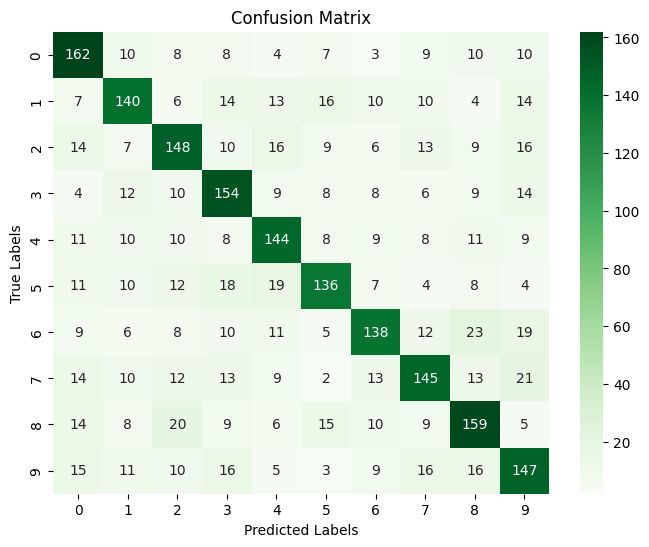

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.70      0.66       231
           1       0.62      0.60      0.61       234
           2       0.61      0.60      0.60       248
           3       0.59      0.66      0.62       234
           4       0.61      0.63      0.62       228
           5       0.65      0.59      0.62       229
           6       0.65      0.57      0.61       241
           7       0.62      0.58      0.60       252
           8       0.61      0.62      0.62       255
           9       0.57      0.59      0.58       248

    accuracy                           0.61      2400
   macro avg       0.62      0.61      0.61      2400
weighted avg       0.61      0.61      0.61      2400



In [ ]:
x_train_prediction = rforest.predict(x_train)
training_accuracy_score = accuracy_score(x_train_prediction,y_train)
print(training_accuracy_score)

1.0


In [ ]:
x_test_prediction = rforest.predict(x_test)
testing_accuracy_score = accuracy_score(x_test_prediction,y_test)
print(testing_accuracy_score)

0.61375


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.70      0.66       231
           1       0.62      0.60      0.61       234
           2       0.61      0.60      0.60       248
           3       0.59      0.66      0.62       234
           4       0.61      0.63      0.62       228
           5       0.65      0.59      0.62       229
           6       0.65      0.57      0.61       241
           7       0.62      0.58      0.60       252
           8       0.61      0.62      0.62       255
           9       0.57      0.59      0.58       248

    accuracy                           0.61      2400
   macro avg       0.62      0.61      0.61      2400
weighted avg       0.61      0.61      0.61      2400



In [ ]:
test_data2 = pd.read_csv('/content/test.csv')
test_data2.head()

,ID,ph_no,cvv,credit_card_number,job,email,url,country,name,rBy2q,...,FHAQY,ac762,jRJ74,5wLB5,zpEmK,vp8so,PcphN,9TgIo,5w00c,SBc0C
0,14000,4.200634e+09,926.0,3.589459e+15,Publishing rights manager,reginaburke@gmail.com,www.reginaburke.com,Indonesia,Regina Burke,2.712238,...,-0.446606,1.522519,6.931677,NaN,-10.428863,-6.181454,2.958331,-2.211944,-1.621354,0.957339
1,14001,4.438271e+09,975.0,6.506603e+15,NaN,johncasey@gmail.com,www.johncasey.com,Greenland,John Casey,1.444836,...,-0.587173,4.245899,-0.167469,-1.136442,-0.795532,-11.883184,0.722020,-0.800209,3.290613,0.052045
2,14002,3.055652e+09,564.0,3.589257e+15,Legal executive,kristenkramer@gmail.com,www.kristenkramer.com,Lithuania,Kristen Kramer,-2.682191,...,-1.309990,0.550669,0.748907,-2.004144,23.081937,-5.482027,-7.217685,-2.313517,-1.498690,3.535574
3,14003,5.543876e+09,109.0,3.531149e+15,Barrister,jamesbutler@gmail.com,www.jamesbutler.com,Antarctica (the territory South of 60 deg S),James Butler,5.854074,...,0.636158,-3.202073,-1.655186,NaN,-4.255389,-8.828225,-2.669042,-2.064670,1.695929,-1.680465
4,14004,2.396016e+09,665.0,2.223874e+15,Tourist information centre manager,ritafischerdvm@gmail.com,www.ritafischerdvm.com,French Southern Territories,Rita Fischer DVM,3.895325,...,0.623116,1.968397,1.870723,2.995444,-2.759011,-10.216802,0.660355,1.254675,-2.349406,0.588911


In [ ]:
test_ids = test_data2['ID']
test_data = test_data2.drop(['ID'],axis=1)
test_data.columns

Index(['ph_no', 'cvv', 'credit_card_number', 'job', 'email', 'url', 'country',
       'name', 'rBy2q', 'bUNzV', 'VdzyG', 'XpfwM', 'uW42n', 'hQN7S', 'uClLP',
       'YOqIp', 'f7sAY', 'tJ4Em', 'SoU5O', 'Onazd', 'vxPsy', 'Rjaxb', 'BqAff',
       'k7vYG', 'De7G2', 'ZmjbO', '5Cpnp', 'rFkNX', 'FHAQY', 'ac762', 'jRJ74',
       '5wLB5', 'zpEmK', 'vp8so', 'PcphN', '9TgIo', '5w00c', 'SBc0C'],
      dtype='object')

In [ ]:
d2 = ['6aHwr', 'CbKM4', 'PwJxl', 'rWVvg', '98Zw0', '9buXh','j2tg7', '9zmpX', 'iLeEz', 'qLsIs', 'cBLeM', 'Kawff', 'lsMPq', 'Q30cK','9xquw', 'Q9hGx', 'Yy1lr', 'QcKox', 'xSzpX', 'nU1qr', 'IF0vw', 'k4TZf','GqVFO', 'DW8Cg', 'DJIFU', '75iYS', 'EFCtT', 'iwyoe', 'SFPf1', 'lLlb9']
d1 = ['rBy2q', 'bUNzV', 'VdzyG', 'XpfwM', 'uW42n', 'hQN7S','uClLP', 'YOqIp', 'f7sAY', 'tJ4Em', 'SoU5O', 'Onazd', 'vxPsy', 'Rjaxb','BqAff', 'k7vYG', 'De7G2', 'ZmjbO', '5Cpnp', 'rFkNX', 'FHAQY', 'ac762','jRJ74', '5wLB5', 'zpEmK', 'vp8so', 'PcphN', '9TgIo', '5w00c', 'SBc0C']

res_dict = {}
for i in range(0, len(d1)):
    res_dict[d1[i]] = d2[i]

print(res_dict)


{'rBy2q': '6aHwr', 'bUNzV': 'CbKM4', 'VdzyG': 'PwJxl', 'XpfwM': 'rWVvg', 'uW42n': '98Zw0', 'hQN7S': '9buXh', 'uClLP': 'j2tg7', 'YOqIp': '9zmpX', 'f7sAY': 'iLeEz', 'tJ4Em': 'qLsIs', 'SoU5O': 'cBLeM', 'Onazd': 'Kawff', 'vxPsy': 'lsMPq', 'Rjaxb': 'Q30cK', 'BqAff': '9xquw', 'k7vYG': 'Q9hGx', 'De7G2': 'Yy1lr', 'ZmjbO': 'QcKox', '5Cpnp': 'xSzpX', 'rFkNX': 'nU1qr', 'FHAQY': 'IF0vw', 'ac762': 'k4TZf', 'jRJ74': 'GqVFO', '5wLB5': 'DW8Cg', 'zpEmK': 'DJIFU', 'vp8so': '75iYS', 'PcphN': 'EFCtT', '9TgIo': 'iwyoe', '5w00c': 'SFPf1', 'SBc0C': 'lLlb9'}


In [ ]:
test_data.rename(res_dict,axis=1, inplace = True)

In [ ]:
test_data.head()

,ph_no,cvv,credit_card_number,job,email,url,country,name,6aHwr,CbKM4,...,IF0vw,k4TZf,GqVFO,DW8Cg,DJIFU,75iYS,EFCtT,iwyoe,SFPf1,lLlb9
0,4.200634e+09,926.0,3.589459e+15,Publishing rights manager,reginaburke@gmail.com,www.reginaburke.com,Indonesia,Regina Burke,2.712238,-0.346406,...,-0.446606,1.522519,6.931677,NaN,-10.428863,-6.181454,2.958331,-2.211944,-1.621354,0.957339
1,4.438271e+09,975.0,6.506603e+15,NaN,johncasey@gmail.com,www.johncasey.com,Greenland,John Casey,1.444836,-1.653334,...,-0.587173,4.245899,-0.167469,-1.136442,-0.795532,-11.883184,0.722020,-0.800209,3.290613,0.052045
2,3.055652e+09,564.0,3.589257e+15,Legal executive,kristenkramer@gmail.com,www.kristenkramer.com,Lithuania,Kristen Kramer,-2.682191,0.288236,...,-1.309990,0.550669,0.748907,-2.004144,23.081937,-5.482027,-7.217685,-2.313517,-1.498690,3.535574
3,5.543876e+09,109.0,3.531149e+15,Barrister,jamesbutler@gmail.com,www.jamesbutler.com,Antarctica (the territory South of 60 deg S),James Butler,5.854074,-3.615217,...,0.636158,-3.202073,-1.655186,NaN,-4.255389,-8.828225,-2.669042,-2.064670,1.695929,-1.680465
4,2.396016e+09,665.0,2.223874e+15,Tourist information centre manager,ritafischerdvm@gmail.com,www.ritafischerdvm.com,French Southern Territories,Rita Fischer DVM,3.895325,-3.521486,...,0.623116,1.968397,1.870723,2.995444,-2.759011,-10.216802,0.660355,1.254675,-2.349406,0.588911


In [ ]:
test_data['job'] = label_encode.fit_transform(test_data['job'])
test_data['country'] = label_encode.fit_transform(test_data['country'])
test_data['name'] = label_encode.fit_transform(test_data['name'])
test_data['email'] = label_encode.fit_transform(test_data['email'])
test_data['url'] = label_encode.fit_transform(test_data['url'])
test_data['6aHwr'] = label_encode.fit_transform(test_data['6aHwr'])
test_data['CbKM4'] = label_encode.fit_transform(test_data['CbKM4'])
test_data['PwJxl'] = label_encode.fit_transform(test_data['PwJxl'])
test_data['rWVvg'] = label_encode.fit_transform(test_data['rWVvg'])
test_data['98Zw0'] = label_encode.fit_transform(test_data['98Zw0'])
test_data['9buXh'] = label_encode.fit_transform(test_data['9buXh'])
test_data['j2tg7'] = label_encode.fit_transform(test_data['j2tg7'])
test_data['9zmpX'] = label_encode.fit_transform(test_data['9zmpX'])
test_data['iLeEz'] = label_encode.fit_transform(test_data['iLeEz'])
test_data['qLsIs'] = label_encode.fit_transform(test_data['qLsIs'])
test_data['cBLeM'] = label_encode.fit_transform(test_data['cBLeM'])
test_data['Kawff'] = label_encode.fit_transform(test_data['Kawff'])
test_data['lsMPq'] = label_encode.fit_transform(test_data['lsMPq'])
test_data['Q30cK'] = label_encode.fit_transform(test_data['Q30cK'])
test_data['9xquw'] = label_encode.fit_transform(test_data['9xquw'])
test_data['Q9hGx'] = label_encode.fit_transform(test_data['Q9hGx'])
test_data['Yy1lr'] = label_encode.fit_transform(test_data['Yy1lr'])
test_data['QcKox'] = label_encode.fit_transform(test_data['QcKox'])
test_data['xSzpX'] = label_encode.fit_transform(test_data['xSzpX'])
test_data['nU1qr'] = label_encode.fit_transform(test_data['nU1qr'])
test_data['IF0vw'] = label_encode.fit_transform(test_data['IF0vw'])
test_data['k4TZf'] = label_encode.fit_transform(test_data['k4TZf'])
test_data['GqVFO'] = label_encode.fit_transform(test_data['GqVFO'])
test_data['DW8Cg'] = label_encode.fit_transform(test_data['DW8Cg'])
test_data['DJIFU'] = label_encode.fit_transform(test_data['DJIFU'])
test_data['75iYS'] = label_encode.fit_transform(test_data['75iYS'])
test_data['EFCtT'] = label_encode.fit_transform(test_data['EFCtT'])
test_data['iwyoe'] = label_encode.fit_transform(test_data['iwyoe'])
test_data['SFPf1'] = label_encode.fit_transform(test_data['SFPf1'])
test_data['lLlb9'] = label_encode.fit_transform(test_data['lLlb9'])


In [ ]:
test_data.head()

,ph_no,cvv,credit_card_number,job,email,url,country,name,6aHwr,CbKM4,...,IF0vw,k4TZf,GqVFO,DW8Cg,DJIFU,75iYS,EFCtT,iwyoe,SFPf1,lLlb9
0,4.200634e+09,926.0,3.589459e+15,488,4462,4474,100,4468,4937,2660,...,2712,4354,5796,5836,408,1201,5081,1255,1511,3604
1,4.438271e+09,975.0,6.506603e+15,639,2607,2619,83,2615,4196,1575,...,2606,5543,2820,1789,2410,277,3665,2245,5067,2821
2,3.055652e+09,564.0,3.589257e+15,343,3219,3225,124,3222,1073,3159,...,2024,3642,3613,1215,5821,1377,45,1179,1590,5270
3,5.543876e+09,109.0,3.531149e+15,59,2140,2149,7,2147,5733,544,...,3607,926,1627,5836,1445,653,1166,1347,4135,1430
4,2.396016e+09,665.0,2.223874e+15,615,4544,4558,75,4553,5388,585,...,3590,4645,4455,4861,1842,428,3618,3928,1071,3277


In [ ]:
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)
test_data_imputed = imputer.transform(test_data)

In [ ]:
if np.isnan(test_data_imputed).any():
    test_data_imputed = imputer.transform(test_data)

In [ ]:
test_predictions = rforest.predict(test_data_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
submission = pd.DataFrame({'ID': test_ids, 'TARGET': test_predictions})

In [ ]:
submission['TARGET'].replace(0,'Anxiety', inplace=True)
submission['TARGET'].replace(1,'Death', inplace=True)
submission['TARGET'].replace(2,'Despair', inplace=True)
submission['TARGET'].replace(3,'Dread', inplace=True)
submission['TARGET'].replace(4,'Fatigue', inplace=True)
submission['TARGET'].replace(5,'Nausea', inplace=True)
submission['TARGET'].replace(6,'Pain', inplace=True)
submission['TARGET'].replace(7,'Stress', inplace=True)
submission['TARGET'].replace(8,'Tears', inplace=True)
submission['TARGET'].replace(9,'Worthlessness', inplace=True)

In [ ]:
submission.head(20)
submission.shape

(6000, 2)

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
submission.to_csv('mental_state_submission.csv',index=False)
!cp mental_state_submission.csv "drive/My Drive/"